## Linear Regression using Pytorch

Slightly different from scikit learn but will use the same concepts

In [1]:
import torch  
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weights=torch.nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
        self.bias=torch.nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    def forward(self,x: torch.Tensor) ->torch.Tensor :
        return self.weights*x+self.bias


In [3]:
torch.manual_seed(42)
model_0=LinearRegression()
list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [41]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [5]:
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
Y=X*0.7+0.3 # 0.7=weight and 0.3=bias   
X_test,X_train=X[:int(0.8*len(X))],X[int(0.8*len(X)):]
Y_test,Y_train=Y[:int(0.8*len(X))],Y[int(0.8*len(X)):]
Loss=torch.nn.MSELoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)

<Axes: >

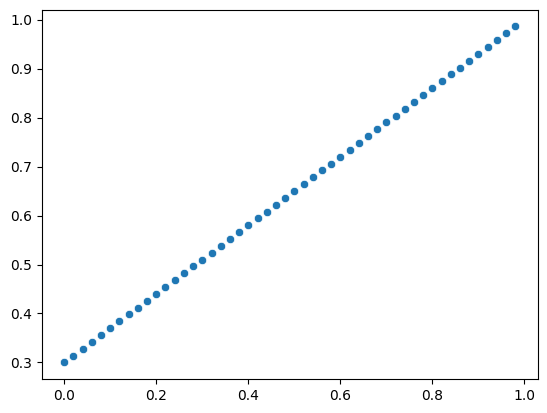

In [11]:
sns.scatterplot(x=X.squeeze(),y=Y.squeeze())

In [54]:
for i in range(10000):
    #training
    model_0.train()
    y_pred=model_0(X_train)
    loss=Loss(y_pred,Y_train) #Like cost function
    optimizer.zero_grad()
    loss.backward() # for backpropagation
    optimizer.step() # for gradient descent



In [51]:
abs(y_pred-Y_train).mean()

tensor(6.8825e-05, grad_fn=<MeanBackward0>)

In [62]:
with torch.inference_mode(): #can do torch.no_grad()
    y_test_pred=model_0(X_train)
    print(Loss(y_pred,Y_train))

tensor(1.4043e-09)


<Axes: >

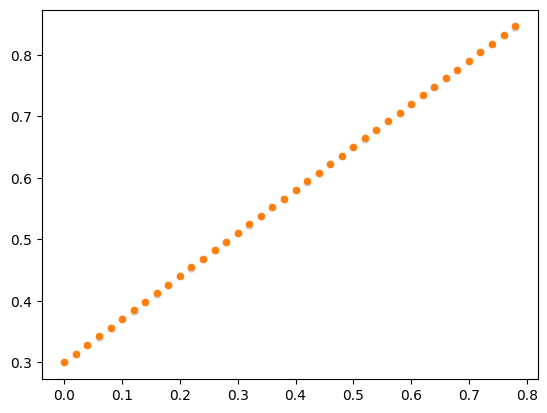

In [59]:
sns.scatterplot(x=X_test.squeeze(),y=Y_test.squeeze())
sns.scatterplot(x=X_test.squeeze(),y=y_test_pred.detach().numpy().squeeze())